In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [32]:
image = cv2.imread("image.png")

In [33]:
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

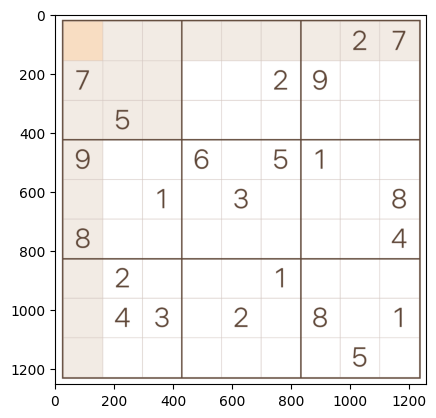

In [34]:
plt.imshow(image, "grey")

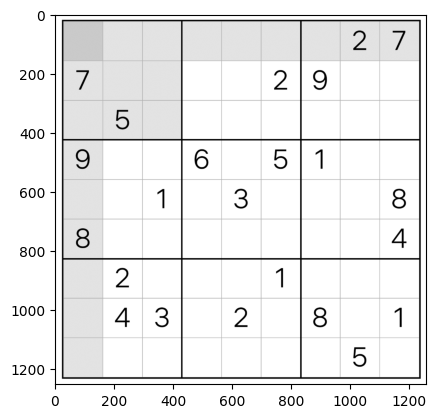

In [35]:
plt.imshow(grey_image, "grey")

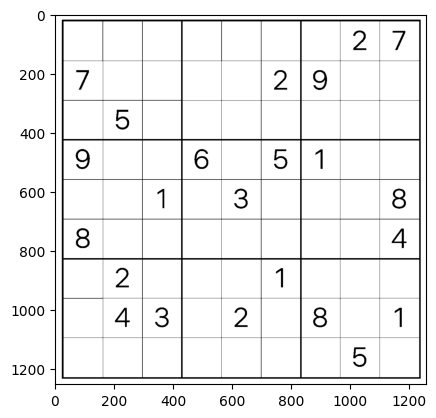

In [36]:
ret, image = cv2.threshold(grey_image,205,255,cv2.THRESH_BINARY)
plt.imshow(image, "grey")

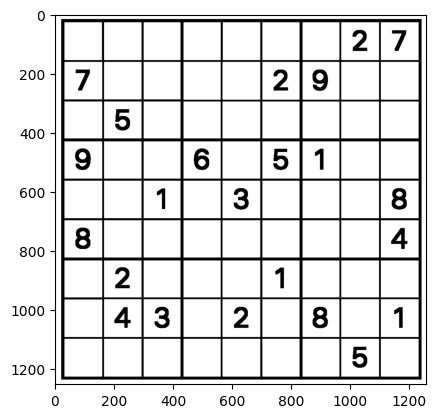

In [37]:
kernel = np.ones((6,6),np.uint8)
image = cv2.erode(image, kernel,iterations = 1)
plt.imshow(image, "grey")

In [38]:
contours, hierarchy = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [39]:
big_box_contour = contours[1]
big_box_area = cv2.contourArea(big_box_contour)
small_sq_area_approx = big_box_area / 100

big_x, big_y, big_w, big_h = cv2.boundingRect(big_box_contour)

coordinates = []

for c in range(2, len(contours)):
    area = cv2.contourArea(contours[c])

    if ((0.9*small_sq_area_approx) < area) and (area < (1.1*small_sq_area_approx)):
        x,y,w,h = cv2.boundingRect(contours[c])
        coordinates.append([x,y,w,h])
        print(f"{c}. {area}: {[x,y,w,h]}")


2. 16129.0: [1103, 1099, 128, 128]
3. 16129.0: [969, 1099, 128, 128]
5. 15748.0: [838, 1099, 125, 128]
6. 15875.0: [702, 1099, 126, 128]
7. 16128.0: [567, 1099, 128, 128]
8. 15875.0: [435, 1099, 126, 128]
9. 15748.0: [300, 1099, 125, 128]
10. 16002.0: [166, 1099, 127, 128]
11. 16128.0: [32, 1099, 128, 128]
12. 16001.5: [32, 966, 128, 127]
13. 16129.0: [1103, 965, 128, 128]
15. 16128.0: [969, 965, 128, 128]
16. 15747.5: [838, 965, 125, 128]
20. 15875.0: [702, 965, 126, 128]
21. 16127.5: [567, 965, 128, 128]
23. 15875.0: [435, 965, 126, 128]
24. 15747.5: [300, 965, 125, 128]
26. 16002.0: [166, 965, 127, 128]
29. 15748.0: [1103, 834, 128, 125]
30. 15748.0: [969, 834, 128, 125]
31. 15376.0: [838, 834, 125, 125]
32. 15500.0: [702, 834, 126, 125]
34. 15747.5: [567, 834, 128, 125]
35. 15500.0: [435, 834, 126, 125]
36. 15376.0: [300, 834, 125, 125]
37. 15624.0: [166, 834, 127, 125]
39. 15747.5: [32, 834, 128, 125]
40. 15875.0: [1103, 698, 128, 126]
43. 15875.0: [969, 698, 128, 126]
44. 15500.0

In [40]:
# use the x,y coordinates of each square to figure out its location relative to the big square

sudoku = [
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
]

for coor in coordinates:
    [x,y,w,h] = coor

    dy = int((y - big_y) / h)
    dx = int((x - big_x) / w)

    sudoku[dy][dx] = image[y:y+h, x:x+w]

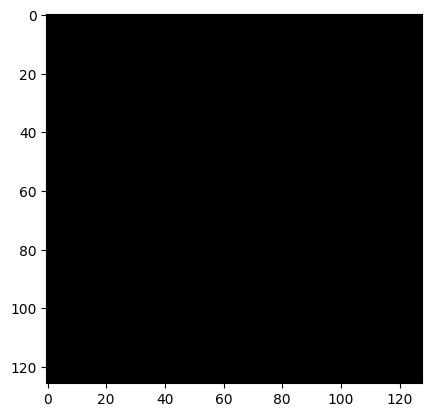

In [41]:
plt.imshow(sudoku[3][4], "grey")

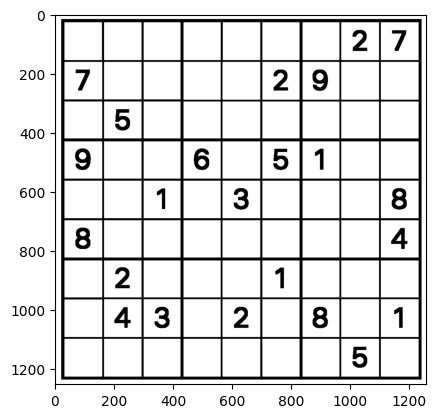

In [42]:
plt.imshow(image,"grey")

In [43]:
import easyocr

reader = easyocr.Reader(['en'], gpu=False)

def read_number(image):
    results = reader.readtext(
        image,
        allowlist='123456789',
        detail=0
    )

    if not results:
        return 0

    # If multiple detections, join or pick largest later
    return "".join(results)


Using CPU. Note: This module is much faster with a GPU.


In [44]:
sudoku_digits = [
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0]
]

for i in range(9):
    for j in range(9):
        print(i, j)
        pred = read_number(sudoku[i][j])
        sudoku_digits[i][j] = pred

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7


/Users/abhimday/.local/share/mise/installs/python/3.12.11/lib/python3.12/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


0 8
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8


0 0 0 0 0 0 0 2 0 
0 0 0 0 0 2 9 0 0 
0 5 0 0 0 0 0 0 0 
9 0 0 6 0 5 1 0 0 
0 0 1 0 3 0 0 0 8 
8 0 0 0 0 0 0 0 4 
0 2 0 0 0 1 0 0 0 
0 4 3 0 2 0 8 0 1 
0 0 0 0 0 0 0 5 0 


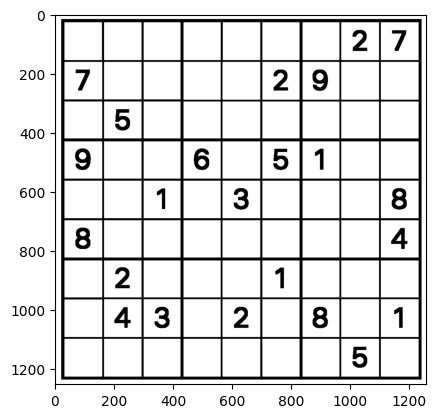

In [45]:
for i in range(9):
    for j in range(9):
        print(sudoku_digits[i][j], end=" ")
    print()
plt.imshow(image, "grey")

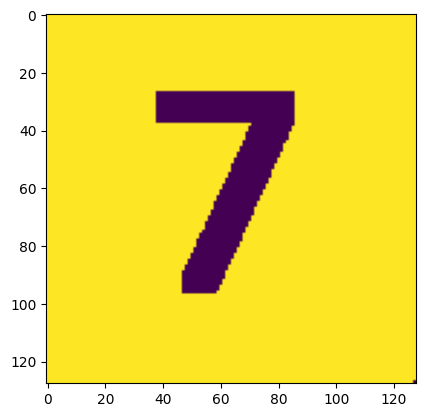

In [46]:
plt.imshow(sudoku[0][8])